In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Reading

In [15]:
df = pd.read_csv("C:/Users/Jayanth/Downloads/amazon-employee-access-challenge/train.csv")

In [16]:
df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


# Data Understanding

In [17]:
df.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [5]:
train_df.shape

(32769, 10)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
ACTION              32769 non-null int64
RESOURCE            32769 non-null int64
MGR_ID              32769 non-null int64
ROLE_ROLLUP_1       32769 non-null int64
ROLE_ROLLUP_2       32769 non-null int64
ROLE_DEPTNAME       32769 non-null int64
ROLE_TITLE          32769 non-null int64
ROLE_FAMILY_DESC    32769 non-null int64
ROLE_FAMILY         32769 non-null int64
ROLE_CODE           32769 non-null int64
dtypes: int64(10)
memory usage: 2.5 MB


In [18]:
df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


# Data Preprocessiong

In [19]:
df.isna().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [63]:
df.ACTION.value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

# Model Building

In [33]:
from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
X = df.drop('ACTION',axis=1)
y = df.ACTION

In [29]:
import seaborn as sns

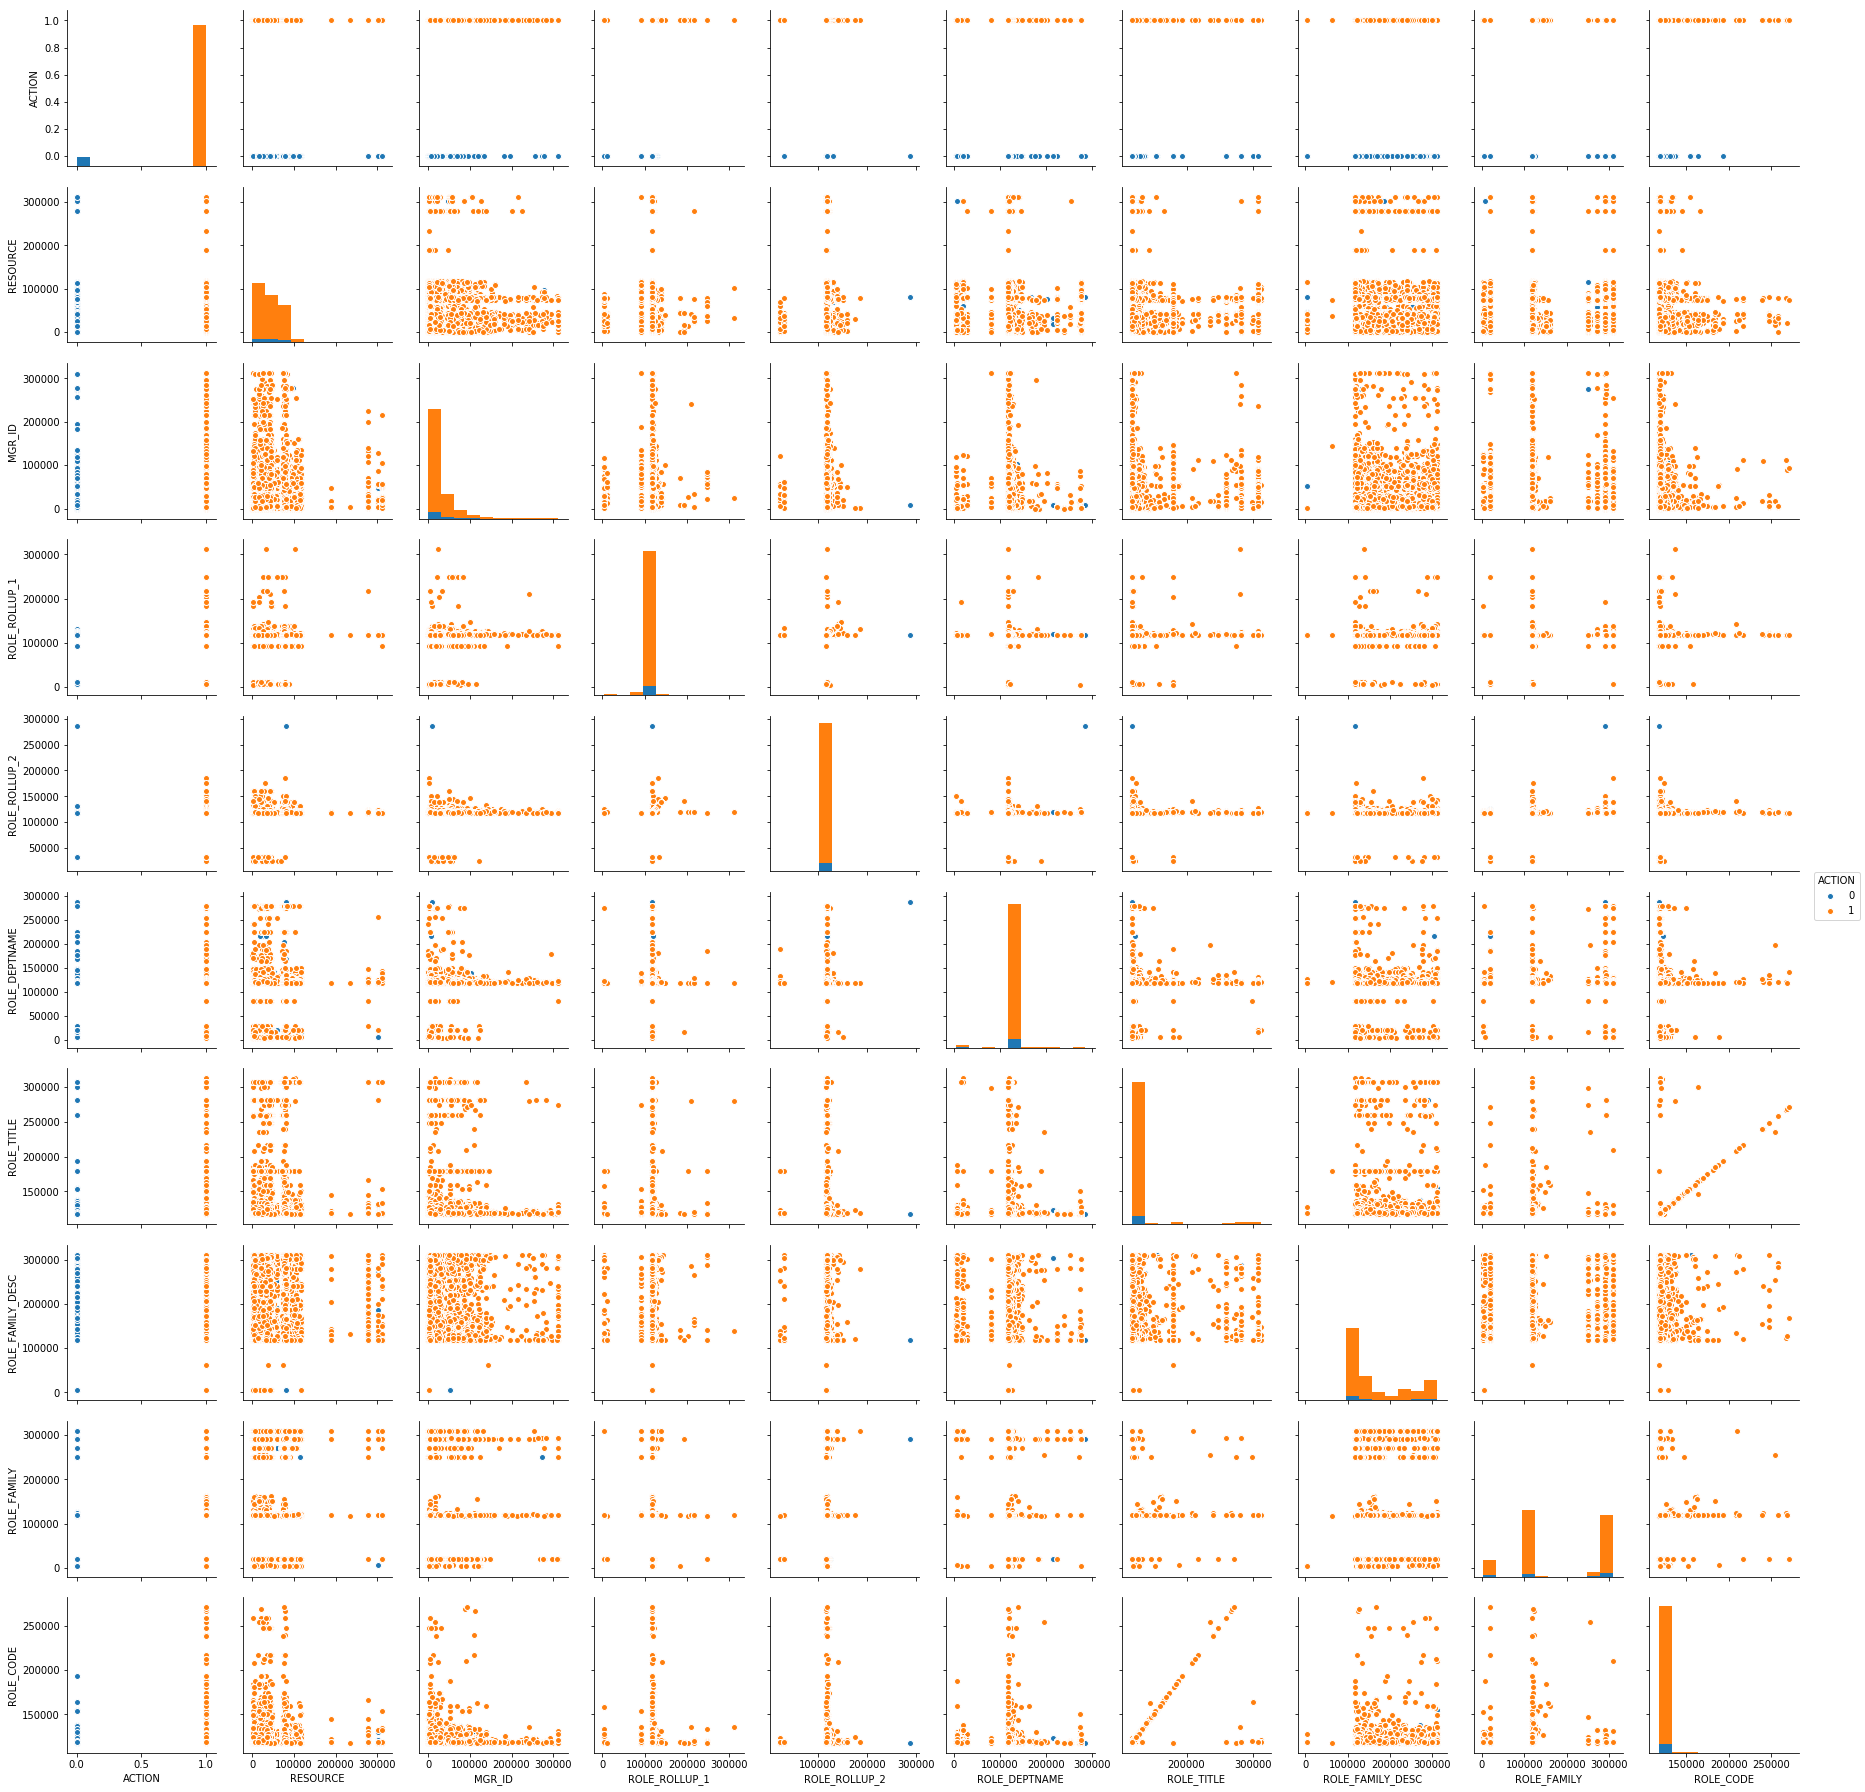

In [30]:
sns.pairplot(df,hue='ACTION')

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
modelDecision = DecisionTreeClassifier()
modelDecision.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
pred = modelDecision.predict(X_test)

In [38]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test,pred)

array([[ 229,  328],
       [ 446, 8828]], dtype=int64)

In [41]:
metrics.f1_score(y_test,pred)

0.9580032555615844

In [52]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6815198104079705

# Gradient Boosting method

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
gb = GradientBoostingClassifier()

In [46]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [47]:
predGb = gb.predict(X_test)

In [48]:
metrics.f1_score(y_test,predGb)

0.9711891042430593

In [49]:
confusion_matrix(y_test,predGb)

array([[  11,  546],
       [   4, 9270]], dtype=int64)

In [53]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predGb)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5096586700758747

In [51]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)


In [58]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [59]:
gsearch1.best_params_

{'n_estimators': 80}

In [60]:
pred_tuning_gb = gsearch1.predict(X_test)

In [62]:
metrics.f1_score(y_test,pred_tuning_gb)

0.9716085017055891

# lets imlement using smote

In [66]:
!pip install imblearn 

  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)


In [67]:
from imblearn.over_sampling import SMOTE


In [68]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [69]:
gsearch1.fit(X_res,y_res)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [70]:
pred_smote = gsearch1.predict(X_test)

In [71]:
metrics.f1_score(y_test,pred_smote)

0.9471145941798651